In [1]:
from keras_unet.models import custom_unet

model = custom_unet(
    input_shape=(128, 128, 1),
    use_batch_norm=False,
    num_classes=1,
    filters=64,
    dropout=0.2,
    output_activation='sigmoid')

C:\Users\Ayushmaan\Anaconda3\envs\keras_unet_1\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Ayushmaan\Anaconda3\envs\keras_unet_1\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Ayushmaan\Anaconda3\envs\keras_unet_1\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Ayushmaan\Anaconda3\envs\keras_

-----------------------------------------
keras-unet init: TF version is < 2.0.0 or not present - using `Keras` instead of `tf.keras`
-----------------------------------------


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [2]:
import os
from skimage.io import imread
from skimage.measure import *
import numpy as np
import sys
sys.path.append("D:\\Desktop\\UCL\\Coursework\\ThirdYear\\Group Research Project\\dlip-project-cs31")
import utils
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

(128, 128, 1)


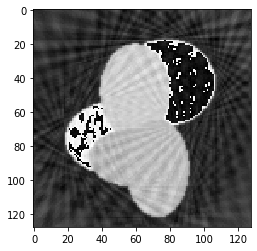

In [3]:
def pretty_print(data, n=9):
    plt.figure(figsize=(2 * n, 2))
    for i in range(1, n+1):
        ax = plt.subplot(1, n, i)
        plt.imshow(data[i].reshape(image_dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

folder_path = "D:\\Desktop\\UCL\\Coursework\\ThirdYear\\Group Research Project\\dlip-project-cs31\\greyscale_pairs"
num_samples = 5000
image_dims = (128, 128)

def pretty_print(data, n=9):
    plt.figure(figsize=(2 * n, 2))
    for i in range(1, n+1):
        ax = plt.subplot(1, n, i)
        plt.imshow(data[i].reshape(image_dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()



x = np.ndarray((num_samples, image_dims[0], image_dims[1]))
y = np.ndarray((num_samples, image_dims[0], image_dims[1]))
for i in range(num_samples):
    x[i] = imread("{}/f_fbp/{}.tif".format(folder_path, i))
    y[i] = imread("{}/f_true/{}.tif".format(folder_path, i))
    
# Normalize values
x = x.astype('float32') / 255.
y = y.astype('float32') / 255.

# Desired shape for keras is (n_samples, x, y, n_channels)
x = np.reshape(x, (len(x), image_dims[0], image_dims[1], 1))
y = np.reshape(y, (len(y), image_dims[0], image_dims[1], 1))



x_train_fbp, x_test_fbp, y_train_fbp, y_test_fbp = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train_fbp[0].shape)
y_train_fbp.shape

y_test_fbp.shape

# pretty_print(x_test_fbp)

# pretty_print(y_test_fbp)

plt.imshow(x_test_fbp[1].reshape(image_dims))
plt.gray()

plt.show()

In [4]:
from keras.callbacks import ModelCheckpoint
model_file = "unet_grayscale_keras.h5"
filepath = model_file
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [5]:
model.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(x=x_train_fbp, y=y_train_fbp,epochs=10,shuffle=True,callbacks=callbacks_list,verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
4000/4000 [==============================] - 8252s 2s/step - loss: 0.3553 - accuracy: 0.6738

Epoch 00001: loss improved from inf to 0.35528, saving model to unet_grayscale_keras.h5
Epoch 2/10
4000/4000 [==============================] - 8150s 2s/step - loss: 0.1581 - accuracy: 0.7155

Epoch 00002: loss improved from 0.35528 to 0.15809, saving model to unet_grayscale_keras.h5
Epoch 3/10
4000/4000 [==============================] - 8335s 2s/step - loss: 0.1475 - accuracy: 0.7172

Epoch 00003: loss improved from 0.15809 to 0.14750, saving model to unet_grayscale_keras.h5
Epoch 4/10
4000/4000 [==============================] - 7454s 2s/step - loss: 0.1433 - accuracy: 0.7179

Epoch 00004: loss improved from 0.14750 to 0.14327, saving model to unet_grayscale_keras.h5
Epoch 5/10
4000/4000 [==============================] - 6706s 2s/step - loss: 0.1423 - accuracy: 0.7180

Epoch 00005: loss improved from 0.14327 to 0.14228, saving mode